<a href="https://www.kaggle.com/code/jgfurlan/canada-immigrant-1980-2013?scriptVersionId=145848690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color: grey;">Analyzing the dataset: Canadian Immigration by UN from 1980 to 2013</h1>


<span style="color: red;">source: [IBM Skills Network](https://skills.network/)</span>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

 The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">here</a>.

---



We shall import the necessary libraries to Data Wrangling

In [1]:
from __future__ import print_function # adds compatibility to Python 2
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import warnings
warnings.filterwarnings('ignore')

Preprocessing the Data from the link

In [2]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


Make sure the data corresponds to the archive by printing the **first 5 rows** using the method <code>head()</code> of the DataFrame

In [3]:
df_can.head()        

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Using the method <code>tail()</code> to show the **last 5 rows** of the table

In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


This method can be used to get a short summary of the dataframe.


In [5]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


To get the list of column headers we can call upon the data frame's `columns` instance variable.


In [6]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [7]:
# drop the columns
df_can.drop(['AREA', 'REG', 'DEV','DevName', 'Type', 'Coverage'], axis=1, inplace=True)

Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:


In [8]:
# rename the remaining columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:


In [9]:
df_can['Total'] = df_can.sum(axis=1)
df_can['Total']

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

We can check to see how many null objects we have in the dataset as follows:

In [10]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` and `transpose()` to format in a cleaner way

In [11]:
df_can.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
1980,195.0,508.394872,1949.588546,0.0,0.0,13.0,251.5,22045.0
1981,195.0,566.989744,2152.643752,0.0,0.0,10.0,295.5,24796.0
1982,195.0,534.723077,1866.997511,0.0,0.0,11.0,275.0,20620.0
1983,195.0,387.435897,1204.333597,0.0,0.0,12.0,173.0,10015.0
1984,195.0,376.497436,1198.246371,0.0,0.0,13.0,181.0,10170.0


### Indexing and Selection

Let's filter for the list of `Country`

In [12]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Filtering on the list of countries `('Country')` and the data for years: 1980 - 1985.

In [13]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]
# notice that 'Country' is string, and the years are integers.
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

In [14]:
df_can.set_index('Country', inplace=True)

In [15]:
df_can.head(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [16]:
# optional: to remove the name of the index
df_can.index.name = None

In [17]:
df_can.head(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
1. The full row data (all columns)
2. For year 2013
3. For years 1980 to 1985


We can use the method `df_can[df_can.index == 'Japan']`

In [18]:
df_can[df_can.index == 'Japan']

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Japan,Asia,Eastern Asia,701,756,598,309,246,198,248,422,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


Or we can:
1. `loc()` Japan
2. Transform the `Series` into a `DataFrame`
3. then use `transpose()` to change rows into columns

In 1 line of code:

In [19]:
years = list(map(int, range(1980, 2014)))

In [20]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


In [21]:
# importing plot libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

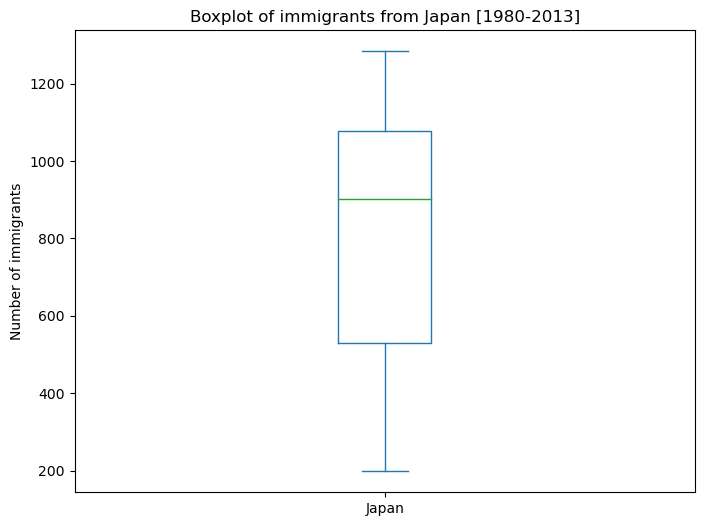

In [22]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Boxplot of immigrants from Japan [1980-2013]')
plt.ylabel('Number of immigrants')
plt.show()

In [23]:
print(f"The number of immigrants from Japan in 2013 was around {df_can.loc['Japan', 2013]}.")

The number of immigrants from Japan in 2013 was around 982.


In [24]:
for index, row in df_can.loc[['Japan'], 1980:1985].iterrows():
    values = ', '.join(map(str, row.values))
    print(f"The number of immigrants from Japan from 1980 to 1985 was {values} respectively.")


The number of immigrants from Japan from 1980 to 1985 was 701, 756, 598, 309, 246, 198 respectively.


Now, let's view Haiti for the following scenarios: <br>1. The full row data (all columns) <br>2. For year 2000 <br>3. For years 1990 to 1995

In [25]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [26]:
print("The values below correspond to the number of immigrants from Haiti.")
df_can.loc['Haiti'].to_frame().transpose()

The values below correspond to the number of immigrants from Haiti.


,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Haiti,Latin America and the Caribbean,Caribbean,1666,3692,3498,2860,1418,1321,1753,2132,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [27]:
print(f"The number of immigrants from Haiti in the year of 2000 was {df_can.loc['Haiti', 2000]}.")

The number of immigrants from Haiti in the year of 2000 was 1631.


Algorithm to print each value as a string:
1. we iterate over each row in the dataframe and extract the values from each year creating a list
2. then assign a variable to the list and transform into a string

In simpler terms, the code loops through the immigration data for Haiti between 1990 and 1995. It extracts the immigrant counts for each year and displays them in a sentence to show how many people immigrated from Haiti during those years.

In [28]:
haiti_90to95 = df_can.loc[['Haiti'], 1990:1995].transpose()
haiti_90to95.rename_axis('Year', axis=1, inplace=True)
haiti_90to95.rename(columns={'Haiti': 'Haiti Immigrants'}, inplace=True)
haiti_90to95


Year,Haiti Immigrants
1990,2379
1991,2829
1992,2399
1993,3655
1994,2100
1995,2014


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [29]:
df_can.columns = list(map(str, df_can.columns))
[print (type(x)) for x in df_can.columns.values]


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [30]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

* Creating a list named 'year' using map function for years ranging from 1990 to 2013.
* Then extract the data series from the
dataframe df_can for Haiti using year list.

In [31]:
from_1990 = list(map(str, range(1990, 2014)))
haiti = df_can.loc['Haiti', from_1990]
haiti = haiti.to_frame()
haiti.rename_axis('Year', axis=1, inplace=True)
haiti.rename(columns={'Haiti': 'Haiti Immigrants'}, inplace=True)
haiti

Year,Haiti Immigrants
1990,2379
1991,2829
1992,2399
1993,3655
1994,2100
1995,2014
1996,1955
1997,1645
1998,1295
1999,1439


### Filtering from Continent<a id="4"></a>

In [32]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [33]:
# filter the dataframe to show the data on Asian countries only (AreaName = Asia)
df_can[condition].head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,0,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,0,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,0,2,1,1,1,3,0,2,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,83,84,86,81,98,92,486,503,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


* Let's narrow the search to Southern Asia
* Filtering for AreaNAme = Asia and RegName = Southern Asia

In [34]:
Southern_Asia = df_can[(df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')]
Southern_Asia.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,83,84,86,81,98,92,486,503,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,0,0,0,0,1,0,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


Fetching the data where AreaName is 'Africa' and Region is 'Southern Africa'. <br>


In [35]:
Southern_Africa = df_can[(df_can['Continent'] == 'Africa') & (df_can['Region'] == 'Southern Africa')]
Southern_Africa

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Botswana,Africa,Southern Africa,10,1,3,3,7,4,2,3,...,7,11,8,28,15,42,53,64,76,396
Lesotho,Africa,Southern Africa,1,1,1,2,7,5,3,1,...,4,0,4,1,8,7,1,0,6,107
Namibia,Africa,Southern Africa,0,5,5,3,2,1,1,4,...,6,19,13,26,14,16,23,24,83,320
South Africa,Africa,Southern Africa,1026,1118,781,379,271,310,718,1470,...,988,1111,1200,1123,1188,1238,959,1243,1240,40568
Swaziland,Africa,Southern Africa,4,1,1,0,10,7,1,2,...,7,7,5,6,10,3,13,17,39,188


Let's sort out dataframe df_can on 'Total' column, in descending order to find out the top 5 countries that contributed the most to immigration to Canada.


In [36]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_can.head(5)
print("Top 5 countries in terms of immigration from 1980 to 2013:")
top_5

Top 5 countries in terms of immigration from 1980 to 2013:


,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Find out top 3 countries that contributes the most to immigration to Canda in the year 2010. <br> Display the country names with the immigrant count in this year

In [37]:
df_top3_2010 = df_can.nlargest(3, '2010')[['2010']].reset_index()
df_top3_2010.columns = ['Top 3 countries', 'Imigrants from 2010']
df_top3_2010

,Top 3 countries,Imigrants from 2010
0,Philippines,38617
1,India,34235
2,China,30391


### Dataviz

Importing RStudio's `ggplot` style for `matplotlib`

In [38]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.


In [39]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.to_frame().transpose()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152


Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

Text(0.5, 0, 'Years')

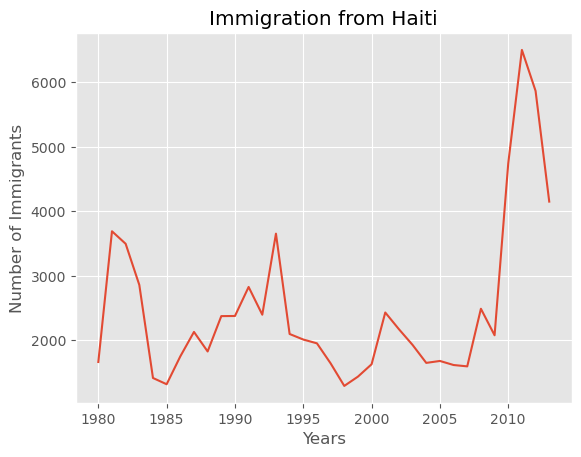

In [40]:
haiti.plot()

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.<br>
<br>
However, notice that years are of type *string*. Let's change the type of the index values to *integer* first.


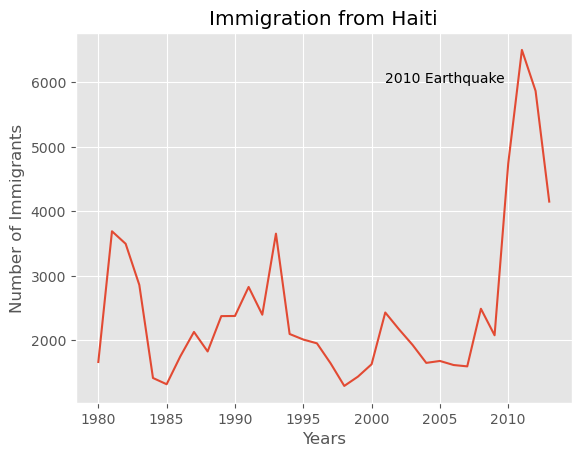

In [41]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2001, 6000, '2010 Earthquake', fontsize=10, color='black') # see note below

plt.show() 

The x-axis represents years, and the y-axis shows the number of immigrants. As we move along the timeline, we witness a remarkable surge in immigration, marked by a striking spike at 2010.

🔗[The 2010 earthquake](https://www.dec.org.uk/article/2010-haiti-earthquake-facts-and-figures) is the catalyst. At this juncture, the plot reveals an unmistakable upward trend, depicting a surge of individuals seeking refuge and opportunities in Canada.

The data mirrors the compassion and resilience of those who migrated, embracing a new chapter amidst hardship. The graph encapsulates their journey from Haiti to Canada, vividly illustrating the societal impact.

Now, let's explore more and get the data set for China and India, and display the dataframe.

In [42]:
df_CI = df_can.loc[['China', 'India'], years]
df_CI = df_CI.T
df_CI

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


Now let's plot the `df_CI` DataFrame

In [43]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting

In [44]:
df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Plotting a line graph to compare China and Haiti Immigrants

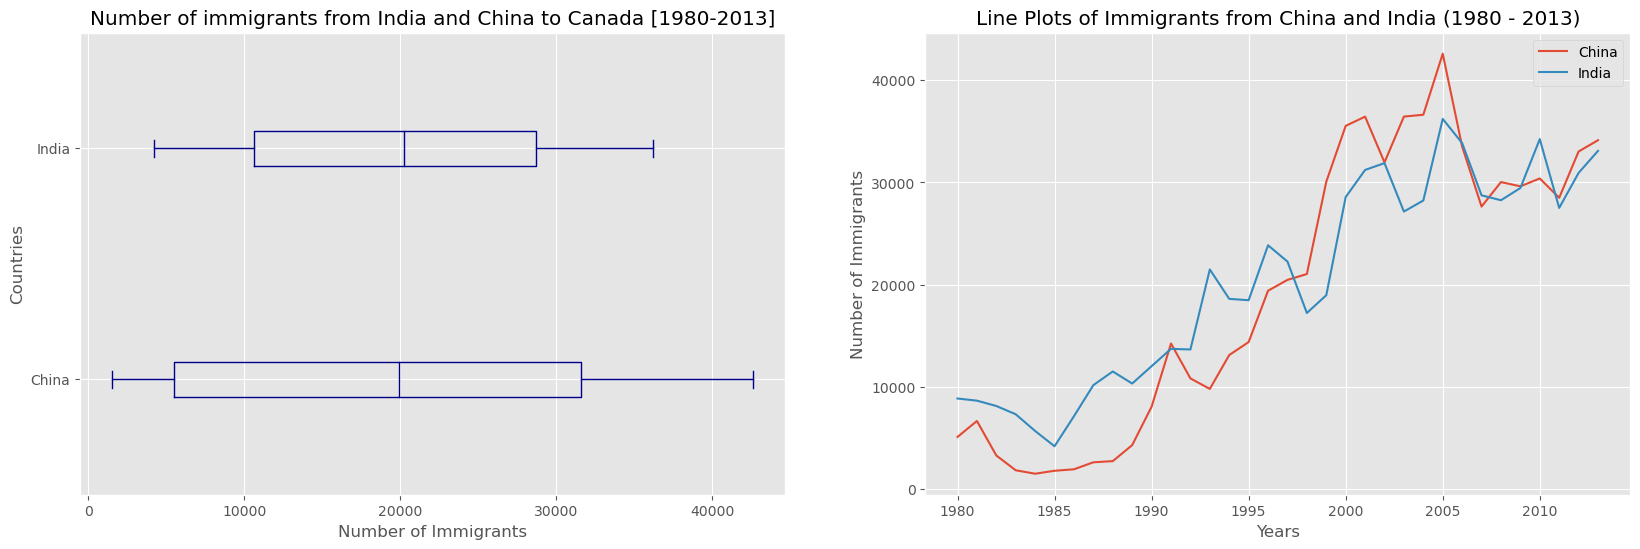

In [45]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_CI.plot(kind='box', figsize=(20,6), color='darkblue', vert=False, ax=ax0)
ax0.set_title('Number of immigrants from India and China to Canada [1980-2013]')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line', figsize=(20,6), ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

### Let's compare the trend of top 5 countries that contributed the most to immigration to Canada.


In [46]:
df_can

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [47]:
top_5.reset_index(inplace=True)
top_5

,index,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


### Changing `'United Kingdom of Great Britain and Northern Ireland` to `'UK'`

In [48]:
# change the name of the column to UK
top_5.iloc[2, 0] = 'UK'
top_5

,index,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,UK,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [49]:
top_5.set_index('index', inplace=True)
top_5.index.name = None

In [50]:
top_5

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


Dropping columns for plotting later

In [51]:
top_5.drop(['Continent', 'Region', 'Total'], axis=1, inplace=True)
top_5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
UK,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [52]:
top_5 = top_5.T

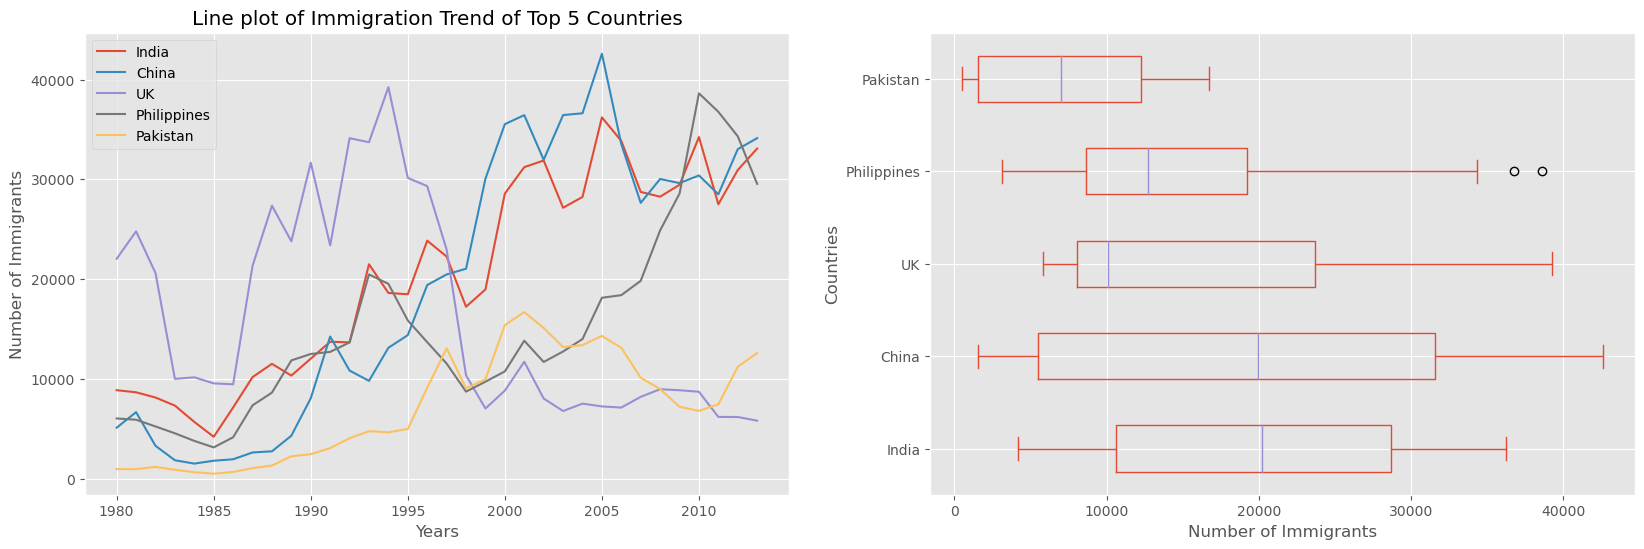

In [53]:
top_5.index = top_5.index.map(int)

fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

top_5.plot(kind='line',
           figsize=(20, 6),
           title='Line plot of Immigration Trend of Top 5 Countries', ax=ax0)
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Years')

top_5.plot(kind='box', figsize=(20,6), ax=ax1, vert=False)
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')

plt.show()

Creating a Area Plot to visualize the top 5 countries.

In [54]:
top_5.index = top_5.index.map(int)

Text(0, 0.5, 'Years')

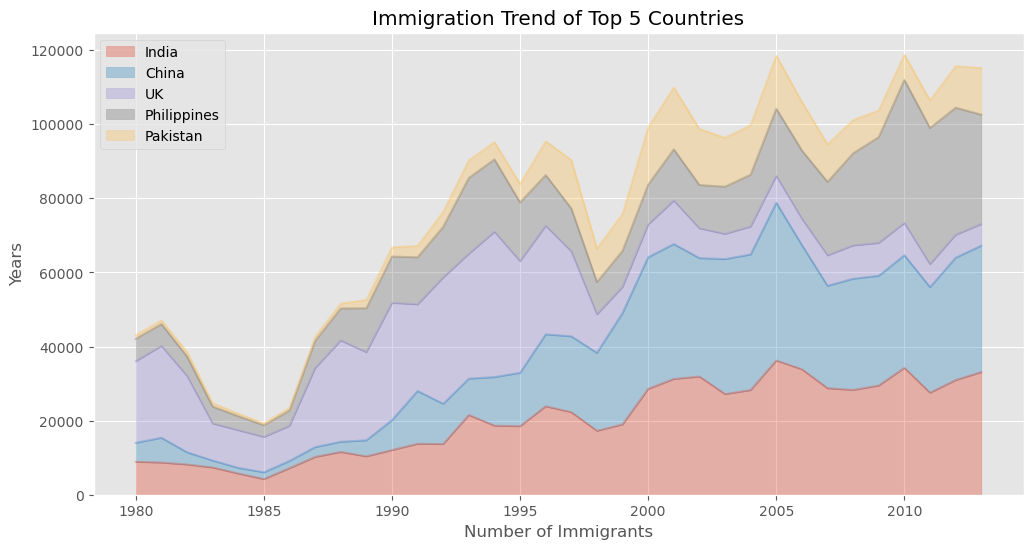

In [55]:
ax = top_5.plot(kind='area', alpha=0.35, figsize=(12, 6))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Years')


Text(0.5, 0, 'Years')

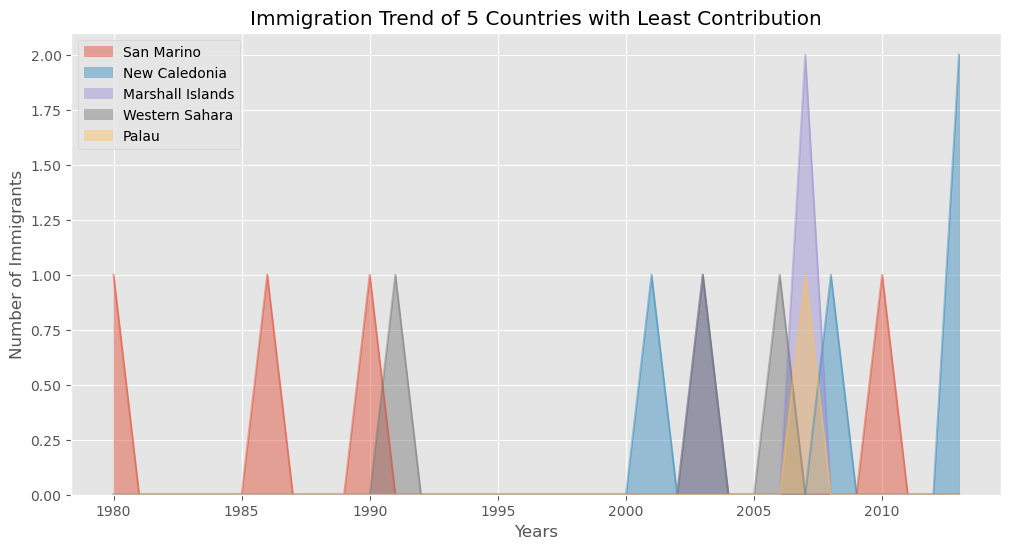

In [56]:
#The correct answer is:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)
     
df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
ax1 = df_least5.plot(kind='area', stacked=False, alpha=0.45, figsize=(12, 6)) 

ax1.set_title('Immigration Trend of 5 Countries with Least Contribution')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

Let's quickly view the `'2013'` data.

In [57]:
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [58]:
import numpy as np   
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">

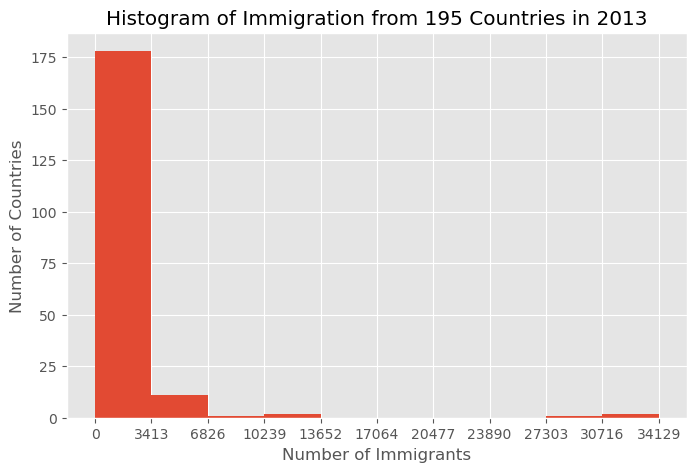

In [59]:
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

The Immigration distribution for Denmark, Norway and Sweden for years 1980-2013:

In [60]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

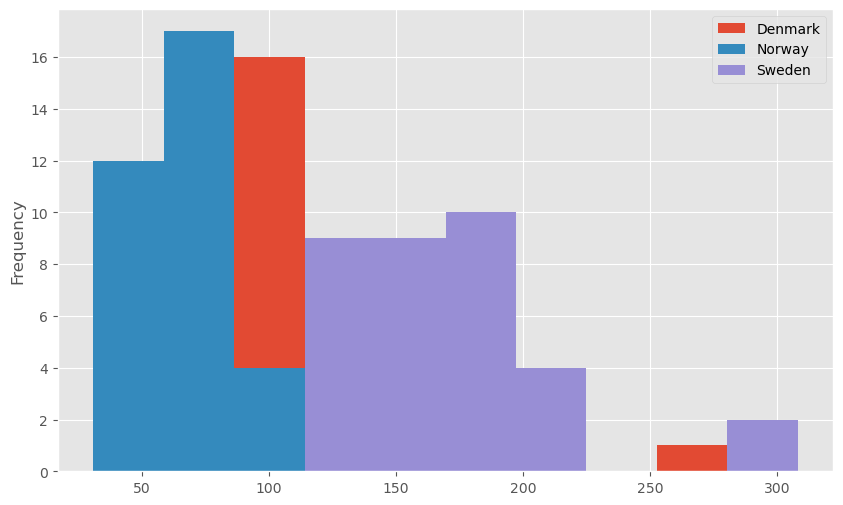

In [61]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.plot.hist(figsize=(10, 6))

Let's improve our graph impact and aesthetics:

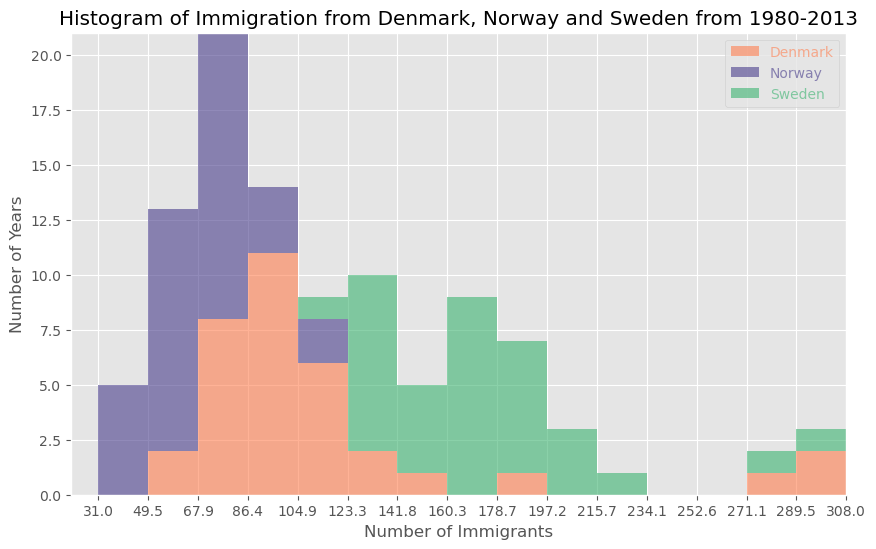

In [62]:
# getting x-tick values
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10 # first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1]  #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes

df_t.plot.hist(figsize=(10, 6),
               bins=15,
               alpha=0.6,
               xticks=bin_edges,
               color=['coral', 'darkslateblue', 'mediumseagreen'],
               stacked=True,
               xlim=(xmin, xmax)
               )

plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013')
plt.ylabel('Number of Years')
plt.legend(labelcolor='linecolor', loc='best')
plt.xlabel('Number of Immigrants')

plt.show()


The immigration Distribution for Greece, Albania and Bulgaria from 1980 to 2013:

In [63]:
gab = df_can.loc[['Greece','Albania','Bulgaria'], years]
gab

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [64]:
gab = gab.T # transposing for plotting

Text(0.5, 0, 'Number of Immigrants')

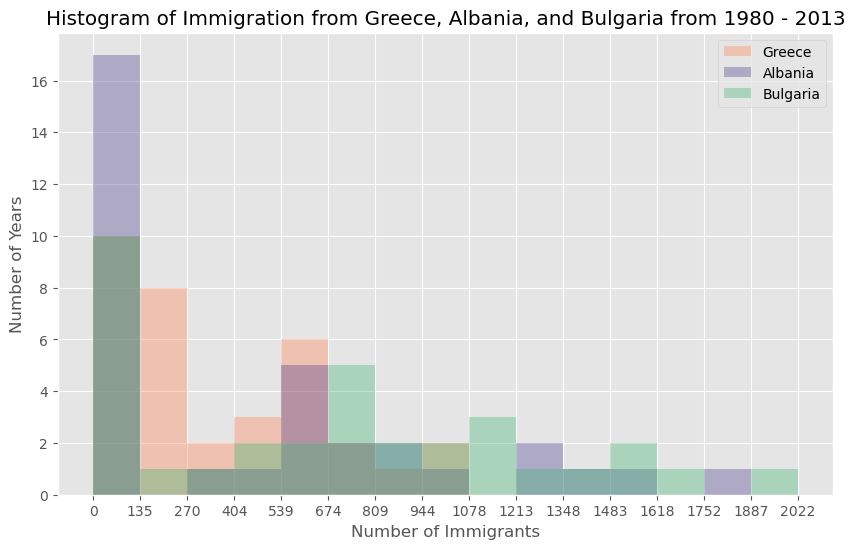

In [65]:
count, bin_edges = np.histogram(gab, 15)

gab.plot.hist(figsize=(10, 6),
              bins=15,
              alpha=0.35,
              xticks=bin_edges,
              stacked=False,
              color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

Comparing the number of `Icelandic` immigrants (country= `'Iceland'`) to Canada from year 1980 to 2013

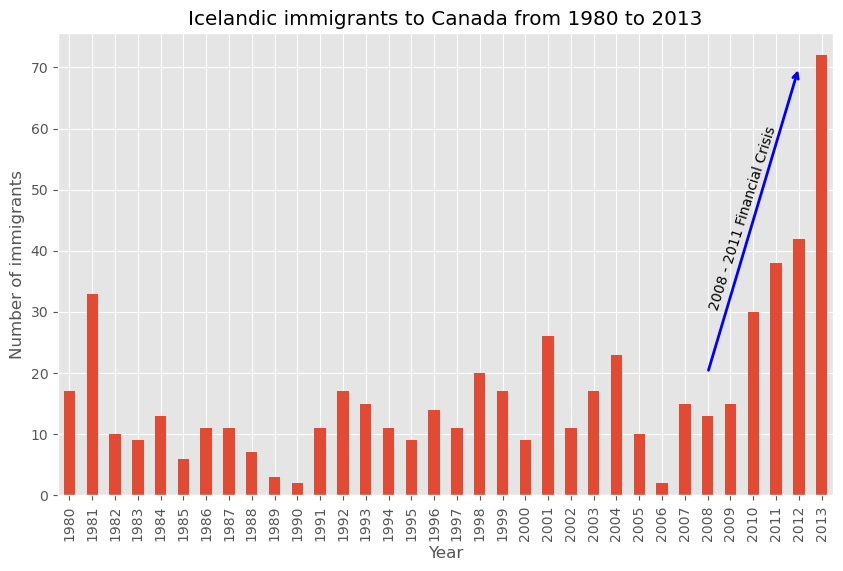

In [66]:
iceland = df_can.loc['Iceland', years]
iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.annotate('', # s:  str. Will leave it blank for no text
             xy=(32,70), # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28,20), # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data', # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->',
             connectionstyle='arc3', 
             color='blue', lw=2)  
            )

plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

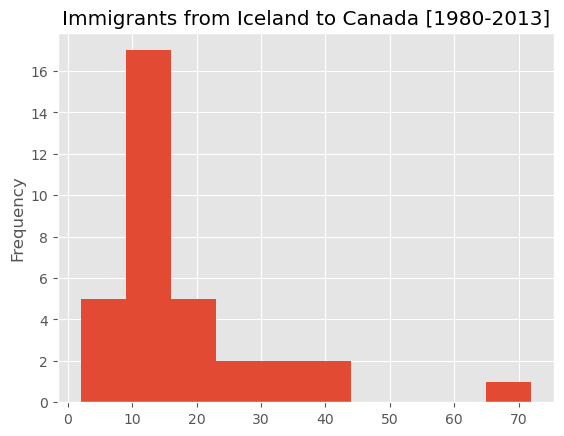

In [67]:
iceland.plot(kind='hist')
plt.title('Immigrants from Iceland to Canada [1980-2013]')
plt.show()

<h3>Horizontal bar ploting the top 15 Immigrant Nacionalities</h3>

In [68]:
# importing unchanged DataFrame again
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.set_index('Country', inplace=True)
df_top15 = df_can['Total'].sort_values(ascending=False).head(15) 

In [69]:
# renaming for better format
df_top15.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)
df_top15 = pd.Series(df_top15)


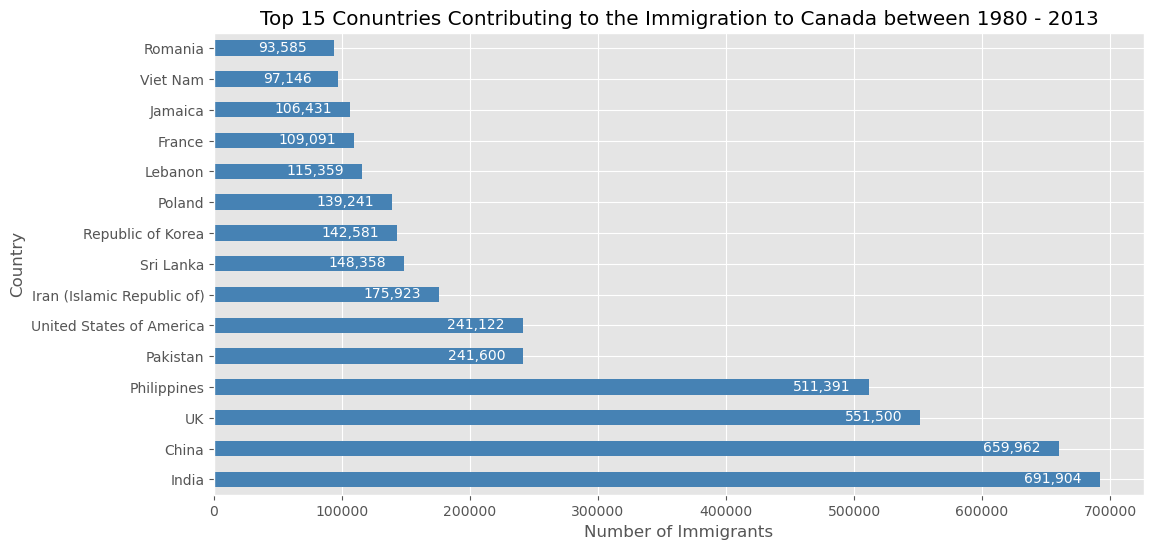

In [70]:
 #The correct answer is:
    # generate plot
df_top15.plot(kind='barh', figsize=(12,6), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
    # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 59000, index - 0.10), color='white')
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)


plt.show()

### Grouping by Continents

1. Creating a new variable to assign the new table summarizing the new data by `Continent`
2. Building a pie chart to visualize the tendencies

In [71]:
# # group countries by continents and apply sum() function 
df_continents = df_can.groupby(by='Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


### Building a `Pie chart` that represents the immigration to Canada from 1980-2013.</h3>
1. First we will build a list of ratios to offset each wedge
2. We mount our chart specifying parameters such as:
Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters: 
* `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


In [72]:
explode_list = [0, 0, 0, 0.1,0.1,0.2]

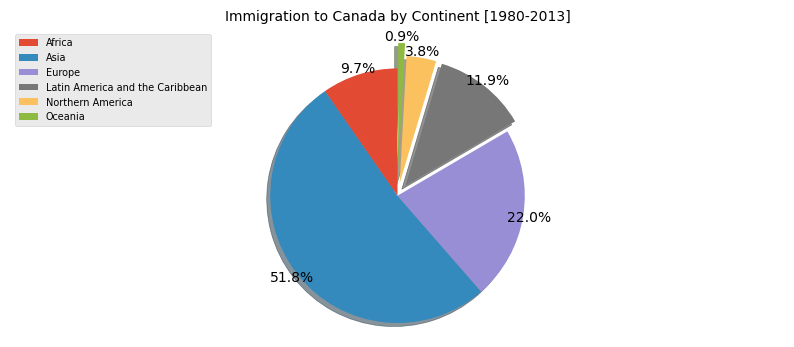

In [73]:
df_continents['Total'].plot(kind='pie',
                           figsize=(10,4),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.05,
                           explode=explode_list                           
                           )

plt.title(label='Immigration to Canada by Continent [1980-2013]',fontsize=10)
plt.ylabel(None)
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left', fontsize=7)

plt.show()

In [74]:
df_top_15 = df_can.sort_values(by='Total', ascending=False).head(15)
df_top_15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


### Creating a new DataFrame that contains the aggregate for each decade.
1. list of every year in each decade
2. create a series by slicing the original DataFrame as sum across all years of each Country.
3. merge the three series into a new data frame.

In [75]:
y_80s = list(map(str, range(1980, 1990)))
y_90s = list(map(str, range(1990, 2000)))
y_00s = list(map(str, range(2000, 2010)))

In [76]:
df_80s = df_top_15.loc[:, y_80s].sum(axis=1)
df_90s = df_top_15.loc[:, y_90s].sum(axis=1)
df_00s = df_top_15.loc[:, y_00s].sum(axis=1)

In [77]:
new_df = pd.DataFrame({'1980s': df_90s, '1990s': df_90s, '2000s': df_00s})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,180395,180395,303591
China,161528,161528,340385
United Kingdom of Great Britain and Northern Ireland,261966,261966,83413
Philippines,138482,138482,172904
Pakistan,65302,65302,127598


In [78]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,85594.666667,85594.666667,97471.533333
std,68237.560246,68237.560246,100583.204205
min,30028.000000,30028.000000,13629.000000
25%,39259.000000,39259.000000,36101.500000
50%,56915.000000,56915.000000,65794.000000
75%,104451.500000,104451.500000,105505.500000
max,261966.000000,261966.000000,340385.000000


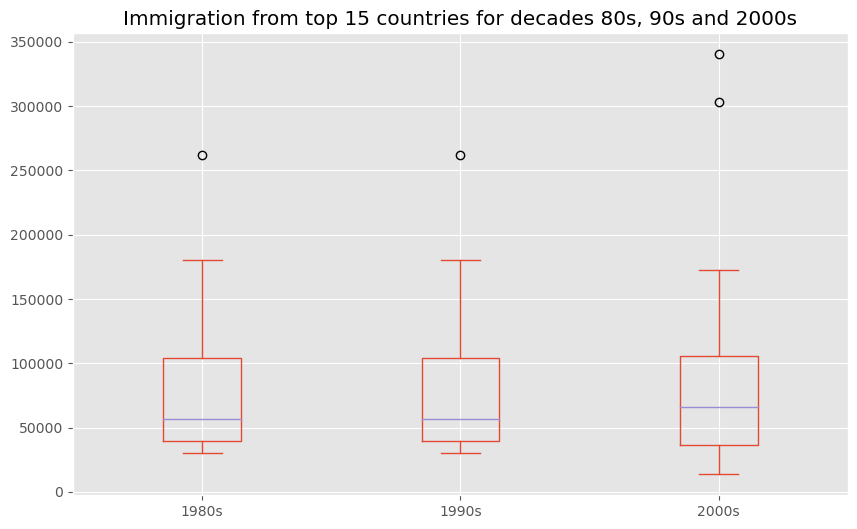

In [79]:
new_df.plot(kind='box', figsize=(10,6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')


plt.show()

As the `boxplot` identifies the outliers. In order to be an outlier, the data must be:
* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

In [80]:
outlier_00s = 105505.5 + (1.5 * 69404)
outlier_00s

209611.5

In [81]:
new_df = new_df.reset_index()
new_df[new_df['2000s']> outlier_00s]

,Country,1980s,1990s,2000s
0,India,180395,180395,303591
1,China,161528,161528,340385


Summary of how general immigrants per years:

In [82]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot = df_tot.rename(columns={0:'Immigrants'})

<txt>Transforming `index` years from `str` to `int` for `Regression` later on.

In [83]:
df_tot.index = map(int, df_tot.index)

* Resetting index
* Renaming columns

In [84]:
df_tot.reset_index(inplace=True)
df_tot.columns = ['year','total']

In [85]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


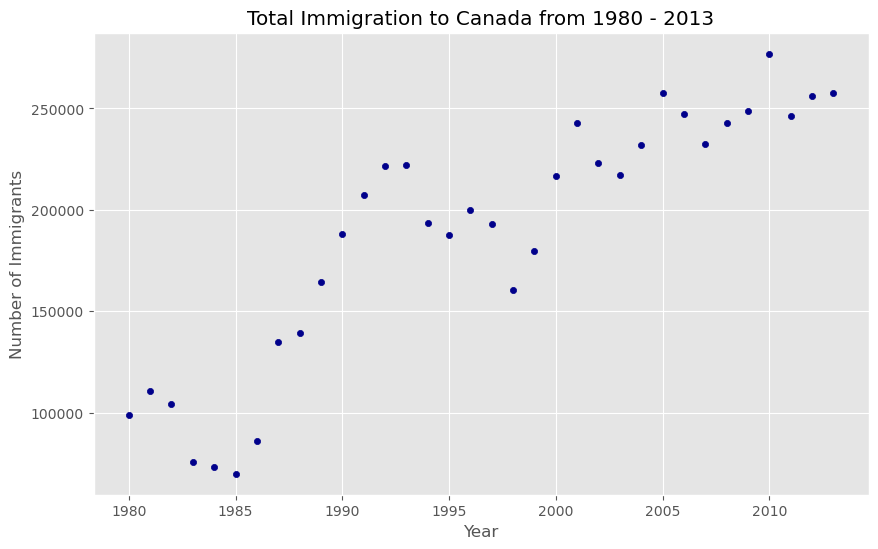

In [86]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

As we can see in the scatter plot, the number of immigrants increase over the years. We can assume there is a linear relation between the variables `year` and `number of immigrants`

In [87]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

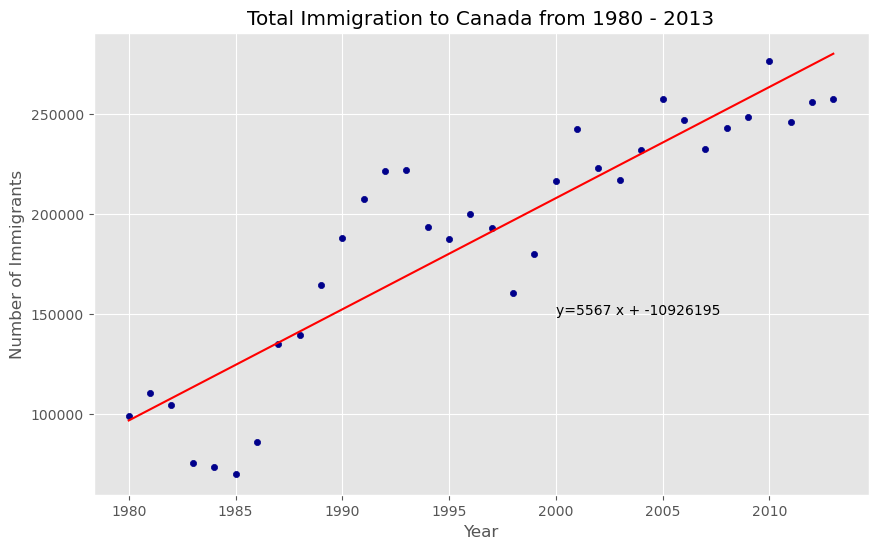

'No. Immigrants = 5567 * Year + -10926195'

In [88]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

To predict the number of immigrants in 2015:

In [89]:
no_immigrants = 5567 * 2015 - 10926195
print(f"The number of immigrants in 2015 based on Linear Regression Prediction is: {no_immigrants}")

The number of immigrants in 2015 based on Linear Regression Prediction is: 291310


When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

**Let's analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

In [90]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [91]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

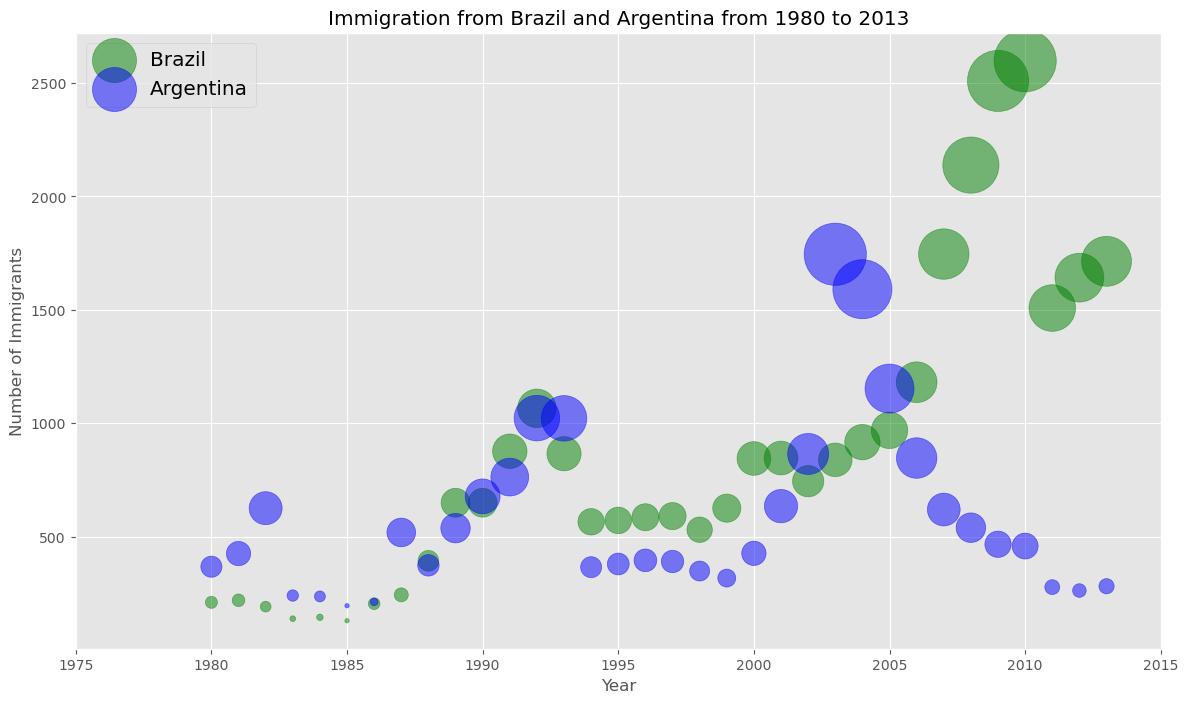

In [92]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

In [93]:
### type your answer here
df_CI = df_can.loc[['China','India'], years].transpose()

# normalized Chinese data
norm_china = (df_CI['China'] - df_CI['China'].min()) / (df_CI['China'].max() - df_CI['China'].min()) 
# normalized Indian data
norm_india = (df_CI['India'] - df_CI['India'].min()) / (df_CI['India'].max() - df_CI['India'].min())

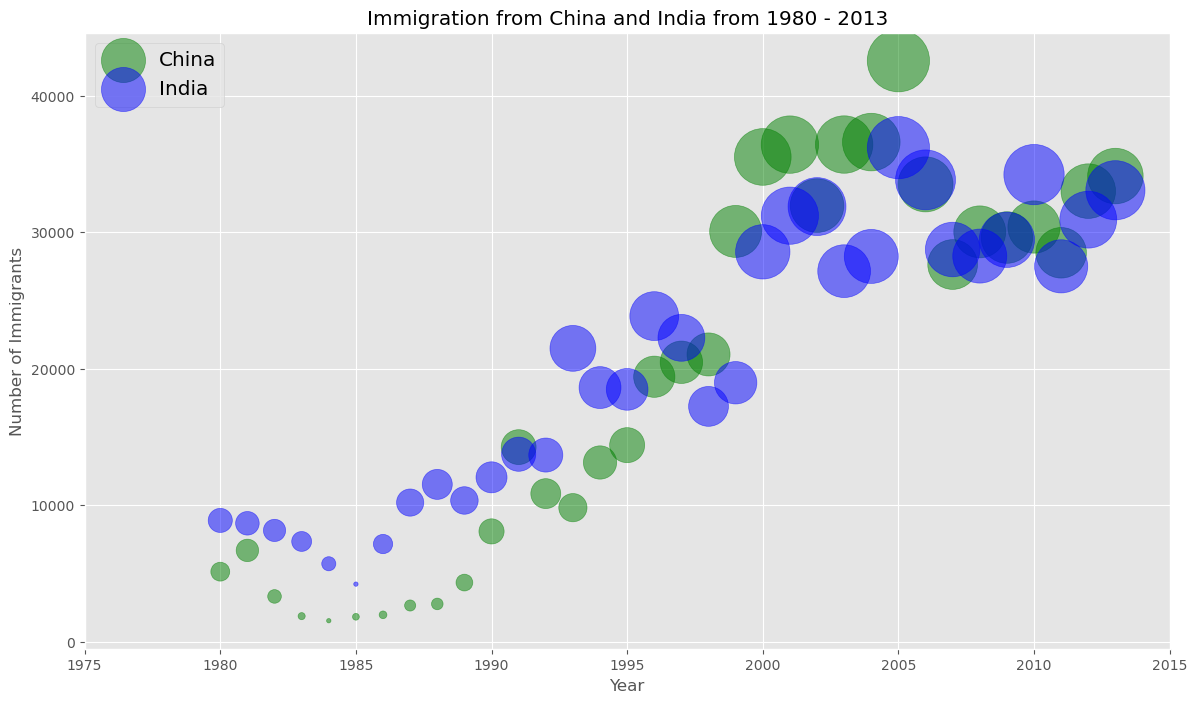

In [94]:
ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

Know, let's make a Choropleth Map importing de GeoJSON file.

In [95]:
# download countries geojson file
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [96]:
import folium

In [97]:
world_geo = r'/kaggle/working/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [98]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [99]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [100]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

## Author
<a href="https://www.linkedin.com/in/joaogfurlan7/" target="_blank">João Gabriel de Oliveira Furlan</a>



### Other Contributors

[Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01),
[Pooja]().
